In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data ="https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [19]:
!wget $data

--2023-09-30 15:02:49--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-09-30 15:02:49 ERROR 404: Not Found.



In [36]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [24]:
columns=df.dtypes

In [25]:
columns=df.dtypes.index

In [27]:
columns=list(columns)

In [28]:
columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [37]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [38]:
categorical_columns=list(df.dtypes[df.dtypes=='object'].index)
for c in categorical_columns:
    df[c]=df[c].str.lower().str.replace(' ','_')

In [39]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [41]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [43]:
tc=pd.to_numeric(df.totalcharges,errors='coerce')

In [46]:
df.totalcharges=df.totalcharges.fillna(0)

In [47]:
df.totalcharges=pd.to_numeric(df.totalcharges,errors='coerce')

In [49]:
df[df.totalcharges.isnull()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-lvygi,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,yes,bank_transfer_(automatic),52.55,NaN,no
753,3115-czmzd,male,0,no,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.25,NaN,no
936,5709-lvoeq,female,0,yes,yes,0,yes,no,dsl,yes,...,yes,no,yes,yes,two_year,no,mailed_check,80.85,NaN,no
1082,4367-nuyao,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.75,NaN,no
1340,1371-dwpaz,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,credit_card_(automatic),56.05,NaN,no
3331,7644-omvmy,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.85,NaN,no
3826,3213-vvolg,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.35,NaN,no
4380,2520-sgtta,female,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.00,NaN,no
5218,2923-arzlg,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,mailed_check,19.70,NaN,no
6670,4075-wkniu,female,0,yes,yes,0,yes,yes,dsl,no,...,yes,yes,yes,no,two_year,no,mailed_check,73.35,NaN,no


In [50]:
df.totalcharges=df.totalcharges.fillna(0)

In [54]:
df.churn=(df.churn=='yes').astype('int')

In [55]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

In [57]:
from sklearn.model_selection import train_test_split


In [61]:
df_train_full,df_test=train_test_split(df,test_size=0.2,random_state=1)

In [62]:
df_train,df_val=train_test_split(df_train_full,test_size=0.25,random_state=1)

In [63]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [64]:
y_train=df_train.churn
y_val=df_val.churn
y_test=df_test.churn

In [65]:
del(df_train['churn'])
del(df_val['churn'])
del(df_test['churn'])

In [67]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,yes,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50


In [69]:
len(df_test), len(df_train), len(df_val)

(1409, 4225, 1409)

In [71]:
df_train_full=df_train_full.reset_index(drop=True)

### 3.4 EDA 

In [72]:
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [73]:
churn_rate=df_train_full.churn.mean()

In [74]:
churn_rate

0.26996805111821087

In [75]:
churn_rate=round(churn_rate,2)

In [78]:
df_train_full.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [79]:
numerical=['tenure','monthlycharges','totalcharges']
df_train_full.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [81]:
categorical_columns=['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod' ]

In [82]:
df[categorical_columns].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# 3.5 Feature Imp:Churn Rate and Risk ratio

In [90]:
df_train_full[df_train_full.gender=='female'].churn.value_counts()

0    2022
1     774
Name: churn, dtype: int64

In [94]:
df_train_full[df_train_full.dependents=='no'].churn.value_counts()

0    2723
1    1245
Name: churn, dtype: int64

In [95]:
df_train_full[df_train_full.dependents=='no'].churn.mean()

0.3137600806451613

In [96]:
churn_rate

0.27

In [97]:
churn_dependent=df_train_full[df_train_full.dependents=='yes'].churn.mean()

In [98]:
churn_no_dependent=df_train_full[df_train_full.dependents=='no'].churn.mean()

In [99]:
churn_rate-churn_no_dependent

-0.04376008064516129

In [100]:
df_train_full.groupby('gender').churn

In [102]:
df_train_full.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [103]:
df_grp=df_train_full.groupby('gender').churn.agg(['mean','count'])

In [105]:
df_grp['diff']=df_grp['mean']-churn_rate
df_grp['risk']=df_grp['mean']/churn_rate

In [106]:
df_grp

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865


In [108]:
for c in categorical_columns:
    df_grp=df_train_full.groupby(c).churn.agg(['mean','count'])
    df_grp['diff']=df_grp['mean']-churn_rate
    df_grp['risk']=df_grp['mean']/churn_rate
    print(df_grp)
    print()
    print()
    
    

            mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006824  1.025274
male    0.263214   2838 -0.006786  0.974865


                   mean  count      diff      risk
seniorcitizen                                     
0              0.242270   4722 -0.027730  0.897297
1              0.413377    912  0.143377  1.531027


             mean  count      diff      risk
partner                                     
no       0.329809   2932  0.059809  1.221515
yes      0.205033   2702 -0.064967  0.759383


                mean  count      diff      risk
dependents                                     
no          0.313760   3968  0.043760  1.162074
yes         0.165666   1666 -0.104334  0.613579


                  mean  count      diff      risk
phoneservice                                     
no            0.241316    547 -0.028684  0.893764
yes           0.273049   5087  0.003049  1.011292


                      mean  count     

# 3.6 Feature Importance: Mutual Information

In [110]:
from sklearn.metrics import mutual_info_score

In [111]:
mutual_info_score(df_train_full.gender,df_train_full.churn)

0.0001174846211139946

In [112]:
mutual_info_score(df_train_full.dependents,df_train_full.churn)

0.012345815445534689

In [113]:
mutual_info_score(df_train_full.partner,df_train_full.churn)

0.009967689095399745

In [114]:
mutual_info_score(df_train_full.contract,df_train_full.churn)

0.0983203874041556

In [115]:
def MUTUAL_SCORE(series):
    return mutual_info_score(series,df_train_full.churn)

In [118]:
df_train_full[categorical_columns].apply(MUTUAL_SCORE)

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [119]:
mis=df_train_full[categorical_columns].apply(MUTUAL_SCORE)

In [120]:
mis.sort_values()

gender              0.000117
phoneservice        0.000229
multiplelines       0.000857
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
paperlessbilling    0.017589
streamingmovies     0.031581
streamingtv         0.031853
paymentmethod       0.043210
deviceprotection    0.043453
onlinebackup        0.046923
internetservice     0.055868
techsupport         0.061032
onlinesecurity      0.063085
contract            0.098320
dtype: float64

In [121]:
mis.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64


# 3.7 Correlation

In [122]:
  df_train_full[numerical].corrwith(df_train_full.churn)  

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [123]:
df_train_full[df_train_full.tenure<2].churn.mean()

0.6247464503042597

In [124]:
df_train_full[df_train_full.tenure>2].churn.mean()

0.22478269658378816

In [128]:
df_train_full[(df_train_full.tenure>2) & (df_train_full.tenure<12)].churn.mean()

0.4059003051881994

# 3.8 One Hot Encoding

In [129]:
 df_train[['gender','contract']].head()

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year


In [130]:
from sklearn.feature_extraction import DictVectorizer

In [134]:
 df_train[['gender','contract']].to_dict()

{'gender': {0: 'female',
  1: 'male',
  2: 'female',
  3: 'female',
  4: 'female',
  5: 'male',
  6: 'male',
  7: 'female',
  8: 'female',
  9: 'female',
  10: 'female',
  11: 'male',
  12: 'female',
  13: 'female',
  14: 'female',
  15: 'male',
  16: 'female',
  17: 'female',
  18: 'male',
  19: 'male',
  20: 'male',
  21: 'female',
  22: 'female',
  23: 'female',
  24: 'male',
  25: 'male',
  26: 'female',
  27: 'female',
  28: 'female',
  29: 'female',
  30: 'male',
  31: 'male',
  32: 'female',
  33: 'female',
  34: 'male',
  35: 'female',
  36: 'female',
  37: 'male',
  38: 'male',
  39: 'female',
  40: 'female',
  41: 'male',
  42: 'female',
  43: 'male',
  44: 'male',
  45: 'female',
  46: 'male',
  47: 'female',
  48: 'male',
  49: 'female',
  50: 'male',
  51: 'male',
  52: 'female',
  53: 'male',
  54: 'female',
  55: 'female',
  56: 'male',
  57: 'male',
  58: 'female',
  59: 'female',
  60: 'male',
  61: 'female',
  62: 'male',
  63: 'female',
  64: 'male',
  65: 'male',
  

In [132]:
dic= df_train[['gender','contract']].to_dict(orient='records')

In [138]:
dv=DictVectorizer(sparse=False)

In [139]:
dv.fit(dic)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)

In [140]:
dv.transform(dic)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.]])

In [142]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

In [143]:
 dct=df_train[['gender','contract','tenure']].to_dict(orient='records')

In [144]:
dv.fit(dct)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)

In [145]:
dv.transform(dct)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       ...,
       [ 1.,  0.,  0.,  0.,  1.,  2.],
       [ 0.,  0.,  1.,  1.,  0., 27.],
       [ 1.,  0.,  0.,  1.,  0.,  9.]])

In [146]:
dict_train=df_train[categorical_columns+numerical].to_dict(orient='records')

In [352]:
dv.fit(dict_train)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)

In [353]:
x_train=dv.transform(dict_train)

In [354]:
dict_val=df_val[categorical_columns+numerical].to_dict(orient='records')
x_val=dv.fit_transform(dict_val)

In [356]:
x_val.shape

(1409, 45)

  # 3.9 Logistic Regression

In [158]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [159]:
z=np.linspace(-10,10,101)

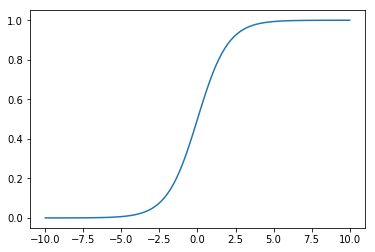

In [160]:
plt.plot(z,sigmoid(z))

In [161]:
def linear_regression(x):
    res=w0
    for i in len(w):
        res=res+x[i]*w[i]
    return res

In [162]:
def logistic_regression(x):
    score=w0
    for i in len(w):
        score=res+x[i]*w[i]
    res=sigmoid(score)
    return res

# 3.10 Training Logistic Regression with Scikit-Learn

In [163]:
 from sklearn.linear_model import LogisticRegression

In [165]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [166]:
model.coef_[0]

array([ 6.06521368e-01, -5.77006547e-02, -6.70754940e-01, -2.78889933e-02,
       -9.40452340e-02,  5.21200773e-02, -1.02681618e-01, -7.13726863e-02,
       -4.20003820e-02, -7.99338452e-02, -3.75798659e-01,  3.56546050e-01,
       -1.02681618e-01,  2.35980450e-03, -2.47634133e-01,  1.33439357e-01,
       -7.73945043e-03,  5.66163133e-02, -1.02681618e-01, -7.58689224e-02,
        2.16934985e-01, -1.02681618e-01, -2.36187594e-01, -2.49227050e-01,
        1.27292823e-01, -1.15843239e-01, -6.09098820e-03, -1.00596736e-01,
       -4.85035359e-02,  6.74372453e-02, -4.02712001e-02,  1.33439357e-01,
       -2.55373584e-01,  1.98888158e-01, -1.01011066e-01, -1.02681618e-01,
        8.17584573e-02, -6.44903105e-02, -1.02681618e-01,  4.52377015e-02,
        1.70075046e-01, -1.02681618e-01, -1.89327655e-01, -6.68710512e-02,
        3.76396155e-04])

In [167]:
model.intercept_[0]

-0.12193422724282793

In [169]:
#hard predictions
model.predict(x_val)

array([0, 0, 0, ..., 0, 1, 1])

In [171]:
#soft predictions
model.predict_proba(x_val)

array([[0.99264114, 0.00735886],
       [0.7902789 , 0.2097211 ],
       [0.77929206, 0.22070794],
       ...,
       [0.85112085, 0.14887915],
       [0.21516185, 0.78483815],
       [0.18942046, 0.81057954]])

In [175]:
#1st column containg prob of +ve churns
y_pred=model.predict_proba(x_val)[:,1]

In [177]:
churn_decision=y_pred>=0.5

In [180]:
df_val[churn_decision].customerid.head()

3     8433-wxgna
8     3440-jpscl
12    7228-omtpn
19    6711-fldfb
24    2612-ranwt
Name: customerid, dtype: object

In [182]:
df_val[churn_decision].head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
24,2612-ranwt,female,0,no,no,12,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,bank_transfer_(automatic),100.15,1164.30


In [183]:
(y_val==churn_decision).mean()

0.8055358410220014

# 3.11 Model Interpretation

In [187]:
a=zip("abcdef",[1,2,3,4,5,6])

In [188]:
list(a)

[('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5), ('f', 6)]

In [193]:
#that is the feature contract having value month to month whihc we made separate column has weight of 0.607
#i.e F1="month to month" has weight w1=0.607

LRM=zip(dv.get_feature_names(),model.coef_[0].round(3))

In [194]:
list(LRM)

[('contract=month-to-month', 0.607),
 ('contract=one_year', -0.058),
 ('contract=two_year', -0.671),
 ('dependents=no', -0.028),
 ('dependents=yes', -0.094),
 ('deviceprotection=no', 0.052),
 ('deviceprotection=no_internet_service', -0.103),
 ('deviceprotection=yes', -0.071),
 ('gender=female', -0.042),
 ('gender=male', -0.08),
 ('internetservice=dsl', -0.376),
 ('internetservice=fiber_optic', 0.357),
 ('internetservice=no', -0.103),
 ('monthlycharges', 0.002),
 ('multiplelines=no', -0.248),
 ('multiplelines=no_phone_service', 0.133),
 ('multiplelines=yes', -0.008),
 ('onlinebackup=no', 0.057),
 ('onlinebackup=no_internet_service', -0.103),
 ('onlinebackup=yes', -0.076),
 ('onlinesecurity=no', 0.217),
 ('onlinesecurity=no_internet_service', -0.103),
 ('onlinesecurity=yes', -0.236),
 ('paperlessbilling=no', -0.249),
 ('paperlessbilling=yes', 0.127),
 ('partner=no', -0.116),
 ('partner=yes', -0.006),
 ('paymentmethod=bank_transfer_(automatic)', -0.101),
 ('paymentmethod=credit_card_(auto

In [196]:
small=['contract','tenure','monthlycharges']
small_train=df_train[small].to_dict(orient='records')
small_val=df_val[small].to_dict(orient='records')

In [200]:
dv_small=DictVectorizer(sparse=False)
x_small_train=dv_small.fit_transform(small_train)


In [198]:
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [201]:
small_model=LogisticRegression()
small_model.fit(x_small_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [206]:
w0=small_model.intercept_[0]
w=small_model.coef_[0]

In [207]:
w

array([ 0.3468418 , -0.64135705, -1.5397301 ,  0.02726015, -0.03635382])

In [211]:
list(zip(dv_small.get_feature_names(),w.round(3)))

[('contract=month-to-month', 0.347),
 ('contract=one_year', -0.641),
 ('contract=two_year', -1.54),
 ('monthlycharges', 0.027),
 ('tenure', -0.036)]

In [212]:
w0

-1.8342453417111402

In [214]:
sigmoid(-1.84+1*0.347+0*(-0.641)+0*(-1.54)+50*(0.027)+5*(-0.036))

0.4199447993562269

# 3.12 Using the Model

In [215]:
dict_train_full=df_train_full[categorical_columns+numerical].to_dict(orient='records')
dict_test=df_test[categorical_columns+numerical].to_dict(orient='records')

In [231]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [331]:
#y_train_full=np.concatenate([y_train,y_val])
y_train_full=df_train_full.churn.values

In [332]:
dv=DictVectorizer(sparse=False)
x_train_full=dv.fit_transform(dict_train_full)
x_test=dv.fit_transform(dict_test)


In [333]:
#model=LogisticRegression()
model.fit(x_train_full,y_train_full)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [334]:
w0=model.intercept_[0]

In [335]:
model.coef_[0]

array([ 5.44419262e-01, -1.56950059e-01, -5.25348383e-01, -4.94250061e-02,
       -8.84541739e-02,  4.44321915e-02, -1.10412187e-01, -7.18991846e-02,
       -5.19638031e-02, -8.59153769e-02, -3.55005359e-01,  3.27538366e-01,
       -1.10412187e-01,  3.61628782e-03, -2.11056028e-01,  1.09941213e-01,
       -3.67643644e-02,  9.37877997e-02, -1.10412187e-01, -1.21254793e-01,
        1.94363555e-01, -1.10412187e-01, -2.21830548e-01, -2.10945279e-01,
        7.30660990e-02, -1.06656233e-01, -3.12229471e-02, -9.90743524e-02,
       -1.20201296e-01,  2.09102038e-01, -1.27705569e-01,  1.09941213e-01,
       -2.47820392e-01,  2.12311032e-01, -1.28443335e-01, -1.10412187e-01,
        1.00976342e-01, -6.30414645e-02, -1.10412187e-01,  3.55744714e-02,
        1.86955944e-01, -1.10412187e-01, -2.14422937e-01, -6.22900251e-02,
        3.37671501e-04])

In [223]:
w=model.coef_[0].round(3)

In [336]:
y_pred=model.predict_proba(x_test)

In [337]:
y_pred=y_pred[:,1]

In [338]:
churn_decision_final=(y_pred>=0.5)

In [339]:
y_pred

array([0.0592793 , 0.12372761, 0.3271663 , ..., 0.0067795 , 0.20057104,
       0.64341167])

In [340]:
(churn_decision_final==y_test).mean()

0.8126330731014905

In [246]:
y_test.head(3)

0    0
1    0
2    0
Name: churn, dtype: int32

In [248]:
##now use model for particular given input data point

In [315]:
customer=dict_test[31]

In [316]:
x_cust=dv.transform(customer)

In [317]:
x_cust.shape

(1, 45)

In [318]:
y_cust=model.predict_proba(x_cust)

In [319]:
y_cust[:,1]


array([0.18956668])

In [320]:
churn_decision_cust=(y_cust[:,1]>=0.5)

In [321]:
list(y_test)[31]

0

In [322]:
customer=dict_test[-1]
x_cust=dv.transform(customer)
y_cust=model.predict_proba(x_cust)
print(y_cust[:,1],list(y_test)[-1])

[0.64341167] 1


In [341]:
y1=np.concatenate([y_train,y_val])
y2=df_train_full.churn.values

In [344]:
y3=(y1==y2)

In [346]:
y3

array([ True, False, False, ..., False,  True, False])

In [347]:
df_train_full.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.7,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.9,3160.55,1


In [349]:
y_train[:2]

0    0
1    0
Name: churn, dtype: int32